In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import acczuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from tqdm import tqdm
from PIL import Image

In [4]:
class SimpleEmotionCNN(nn.Module):
    def __init__(self):
        super(SimpleEmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 7)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
train_dataset = datasets.ImageFolder(r"C:\archive (2)\train", transform=transform)
test_dataset = datasets.ImageFolder(r"C:\archive (2)\test", transform=transform)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Training dataset size: 28709
Test dataset size: 7178


In [5]:
num_epochs = 10
train_batch_size = 32
test_batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

simple_model = SimpleEmotionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simple_model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
simple_model.to(device)

SimpleEmotionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=7, bias=True)
)

In [6]:
for epoch in range(num_epochs):
    simple_model.train()
    running_loss = 0.0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = simple_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

simple_model.eval()
all_preds = []
all_labels = []

Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [06:08<00:00,  2.44it/s]


Epoch 1/10, Loss: 1.6665131143047442


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:44<00:00,  1.71it/s]


Epoch 2/10, Loss: 1.4807476131183268


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:18<00:00,  1.80it/s]


Epoch 3/10, Loss: 1.3639106429897596


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:35<00:00,  1.74it/s]


Epoch 4/10, Loss: 1.2596076940640575


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:23<00:00,  1.78it/s]


Epoch 5/10, Loss: 1.1485818824284857


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:33<00:00,  1.75it/s]


Epoch 6/10, Loss: 1.0233019618919008


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:32<00:00,  1.75it/s]


Epoch 7/10, Loss: 0.8732555242450306


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:32<00:00,  1.75it/s]


Epoch 8/10, Loss: 0.7219160598410265


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████| 898/898 [08:32<00:00,  1.75it/s]


Epoch 9/10, Loss: 0.5705453641795634


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████| 898/898 [08:32<00:00,  1.75it/s]

Epoch 10/10, Loss: 0.4329499299565376


In [7]:
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Evaluating"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = simple_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(all_labels, all_preds))

Evaluating: 100%|████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.33it/s]

Accuracy: 0.49456673168013376
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.40      0.38       958
           1       0.56      0.42      0.48       111
           2       0.38      0.35      0.36      1024
           3       0.70      0.67      0.68      1774
           4       0.42      0.46      0.44      1233
           5       0.37      0.36      0.36      1247
           6       0.68      0.68      0.68       831

    accuracy                           0.49      7178
   macro avg       0.50      0.48      0.48      7178
weighted avg       0.50      0.49      0.50      7178



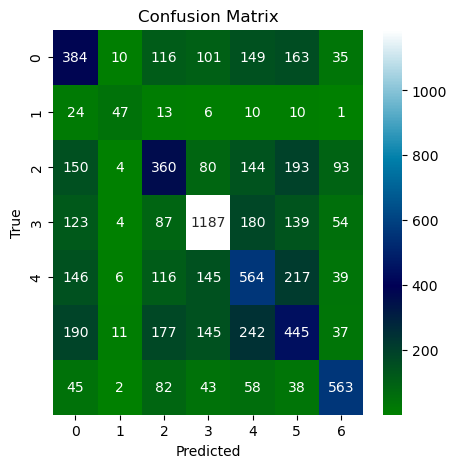

In [13]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='ocean', xticklabels=range(7), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

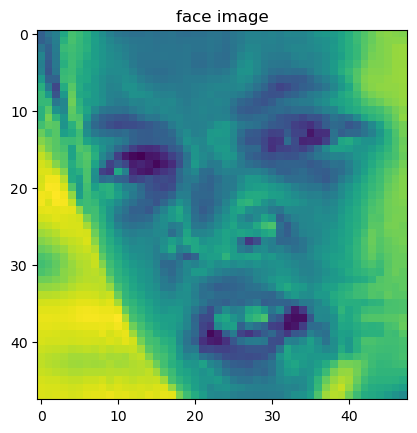

Predicted Emotion Label for Sample Image: 1
face emotion detected is disgust
None


In [32]:
sample_image_path = r"C:\archive (2)\test\disgust\PublicTest_9727119.jpg"
sample_image = Image.open(sample_image_path).convert("L")
sample_image = transform(sample_image).unsqueeze(0)
sample_image = sample_image.to(device)
simple_model.eval()

plt.title("face image")
image=mpimg.imread(r"C:\archive (2)\test\disgust\PublicTest_9727119.jpg")
plt.imshow(image)
plt.show()

with torch.no_grad():
    sample_output = simple_model(sample_image)
_, sample_predicted_label = torch.max(sample_output, 1)

print(f"Predicted Emotion Label for Sample Image: {sample_predicted_label.item()}")
emotion_label=1
def switch(emotion_label):
    if emotion_label==0:
        print("face emotion detected is angry")
    elif emotion_label==1:
        print("face emotion detected is disgust")
    elif emotion_label==2:
        print("face emotion detected is fear")
    elif emotion_label==3:
        print("face emotion detected is happy")
    elif emotion_label==4:
        print("face emotion detected is neutral")
    elif emotion_label==5:
        print("face emotion detected is sad facce")
    elif emotion_label==6:
        print("face emotion detected is surprised")
print(switch(emotion_label))